In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import numpy as np
from torchvision import transforms
from utils.dataset import LandmarksDataset, ToTensor, RandomScale, AugColor, Rotate

In [3]:
train_lungs = open("train_images_lungs.txt",'r').read().splitlines()
train_heart = open("train_images_heart.txt",'r').read().splitlines()

## For Lungs

In [4]:
dataset = LandmarksDataset(train_lungs,
                           img_path = "../Chest-xray-landmark-dataset/Images",
                           label_path = "../Chest-xray-landmark-dataset/landmarks",
                           heart = False,
                           transform = transforms.Compose([
                                       RandomScale(),
                                       Rotate(3),
                                       AugColor(0.40),
                                       ToTensor()])
                           )

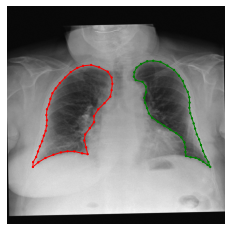

In [5]:
import matplotlib.pyplot as plt
from utils.utils import drawOrgans

sample = dataset[0]
landmarks = sample['landmarks']

RL = landmarks[:44] * 1024
LL = landmarks[44:94] * 1024
H = landmarks[94:] * 1024

drawOrgans(RL,LL,H, sample['image'][0,:,:])

Running 100 times every landmark with random data augmentations, but without images

In [6]:
from utils.datasetNoImages import LandmarksDataset, ToTensor, RandomScale, Rotate

dataset = LandmarksDataset(train_lungs,
                           img_path = "../Chest-xray-landmark-dataset/Images",
                           label_path = "../Chest-xray-landmark-dataset/landmarks",
                           heart = False,
                           transform = transforms.Compose([
                                       RandomScale(),
                                       Rotate(3),
                                       ToTensor()])
                           )
targets = []

for j in range(0, 100):
    print('\r',j+1,'of', 100, end='')
    for i in range(0, len(dataset.images)):   
        sample = dataset[i]

        target = sample['landmarks']
        target = target.reshape(1, -1).numpy()
        targets.append(target)
    

targets = np.concatenate(targets, axis = 0)

 100 of 100

(-0.5, 1023.5, 1023.5, -0.5)

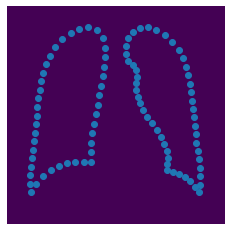

In [7]:
average = targets.mean(axis = 0).reshape(-1 ,2)

plt.imshow(np.zeros([1024,1024]))
plt.scatter(average[:,0] * 1024, average[:,1] * 1024)
plt.axis('off')

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=64)
pca.fit(targets)

components = pca.components_
np.save("models/lungs_pca_components.npy", components)

mean = pca.mean_
np.save("models/lungs_pca_mean.npy", mean)

## For lungs and heart

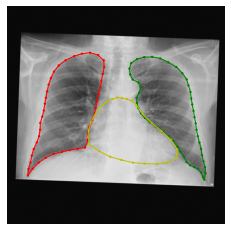

In [9]:
from utils.dataset import LandmarksDataset, ToTensor, RandomScale, AugColor, Rotate

dataset = LandmarksDataset(train_heart,
                           img_path = "../Chest-xray-landmark-dataset/Images",
                           label_path = "../Chest-xray-landmark-dataset/landmarks",
                           heart = True,
                           transform = transforms.Compose([
                                       RandomScale(),
                                       Rotate(3),
                                       AugColor(0.40),
                                       ToTensor()])
                           )

sample = dataset[2]
landmarks = sample['landmarks']

RL = landmarks[:44] * 1024
LL = landmarks[44:94] * 1024
H = landmarks[94:] * 1024

drawOrgans(RL,LL,H, sample['image'][0,:,:])

In [10]:
from utils.datasetNoImages import LandmarksDataset, ToTensor, RandomScale, Rotate

dataset = LandmarksDataset(train_heart,
                           img_path = "../Chest-xray-landmark-dataset/Images",
                           label_path = "../Chest-xray-landmark-dataset/landmarks",
                           heart = True,
                           transform = transforms.Compose([
                                       RandomScale(),
                                       Rotate(3),
                                       ToTensor()])
                           )
targets = []

for j in range(0, 100):
    print('\r',j+1,'of', 100, end='')
    for i in range(0, len(dataset.images)):   
        sample = dataset[i]

        target = sample['landmarks']
        target = target.reshape(1, -1).numpy()
        targets.append(target)
    

targets = np.concatenate(targets, axis = 0)

 100 of 100

(-0.5, 1023.5, 1023.5, -0.5)

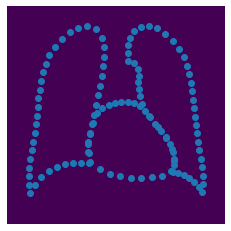

In [11]:
average = targets.mean(axis = 0).reshape(-1 ,2)

plt.imshow(np.zeros([1024,1024]))
plt.scatter(average[:,0] * 1024, average[:,1] * 1024)
plt.axis('off')

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=64)
pca.fit(targets)

components = pca.components_
np.save("models/heart_pca_components.npy", components)

mean = pca.mean_
np.save("models/heart_pca_mean.npy", mean)